In [10]:
import os
from analysis import get_max_stable_temp
from test_file import Fake_file
from analysis import get_protein_max_stability_temp
import my_lammps as ml
from protein_template import Protein_Template
from util import Util
from lammps import PyLammps
from my_lammps import MyLammps, ID_counter
from logger import Logger
from error import ConvergenceError


 /Users/mathieuouellet/Desktop/AMP/AMP/src/test/test_healthy_1_newclass.lj 

overwritten file
overwritten file
0
LAMMPS output is captured by PyLammps wrapper
500


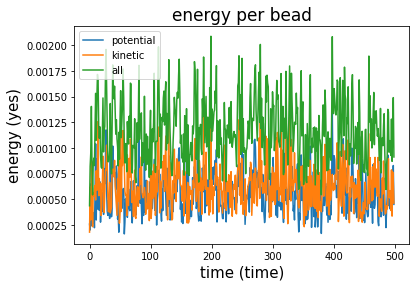

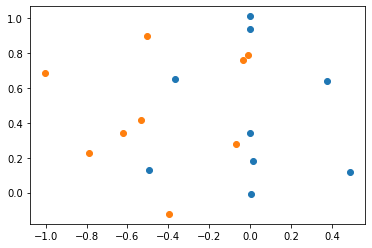

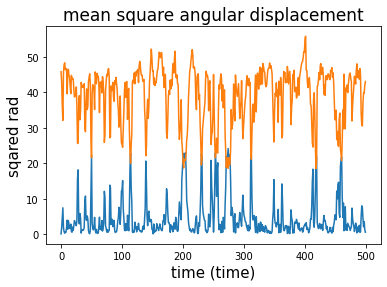

1
LAMMPS output is captured by PyLammps wrapper
500


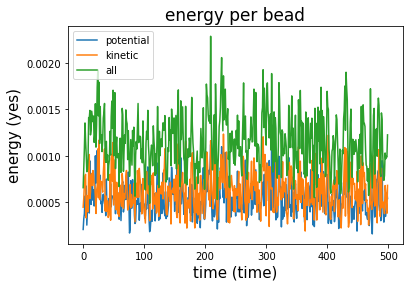

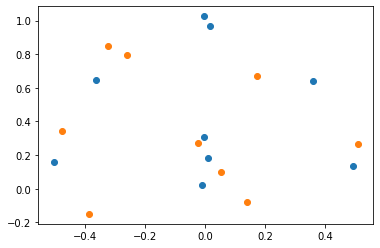

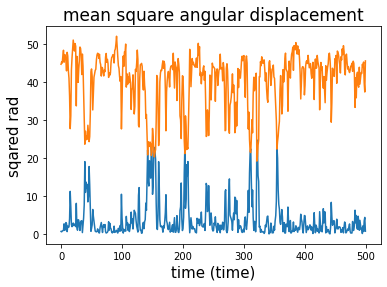

2
LAMMPS output is captured by PyLammps wrapper
500


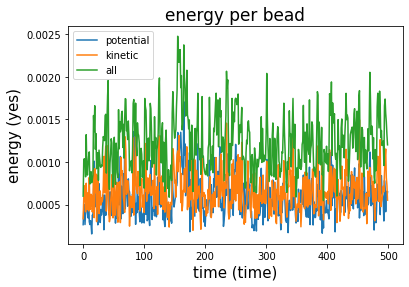

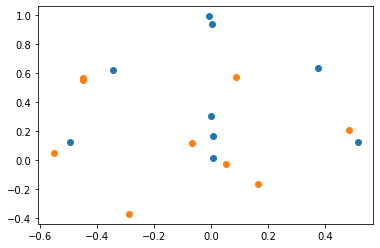

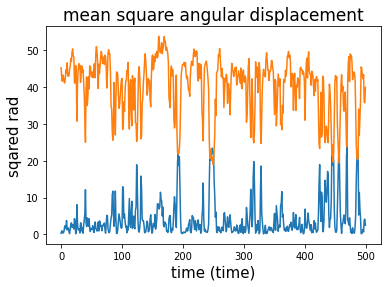

3
LAMMPS output is captured by PyLammps wrapper
500


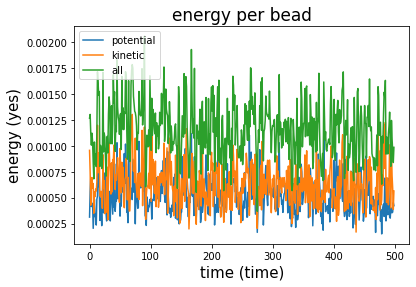

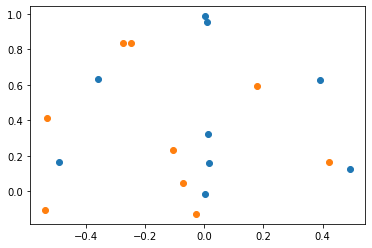

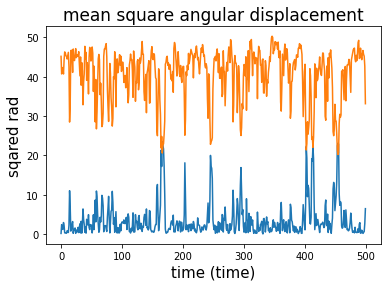

4
LAMMPS output is captured by PyLammps wrapper
500


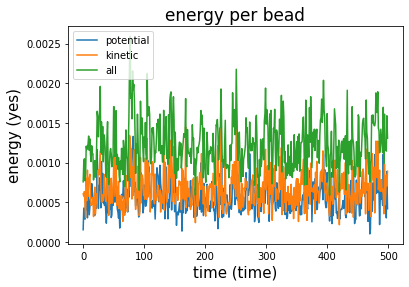

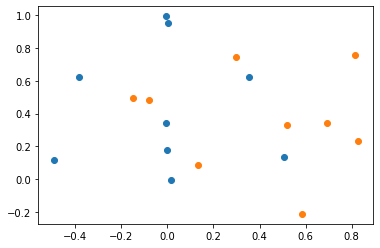

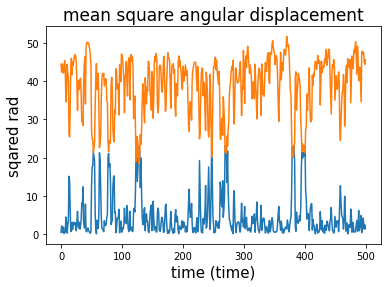

5
LAMMPS output is captured by PyLammps wrapper
500


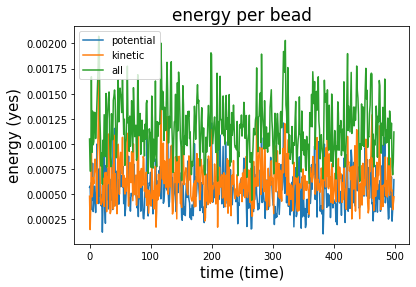

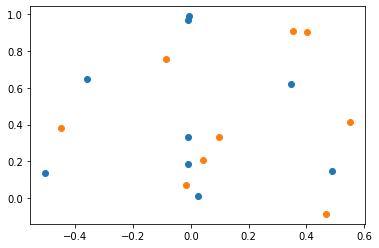

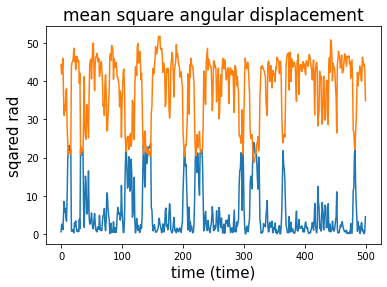

6
LAMMPS output is captured by PyLammps wrapper
500


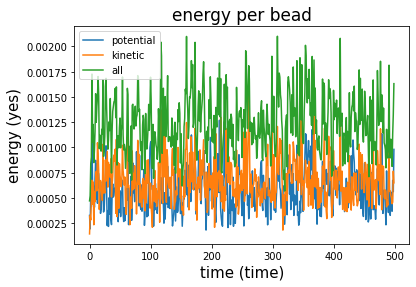

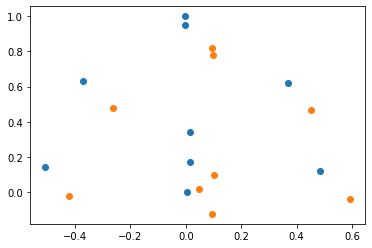

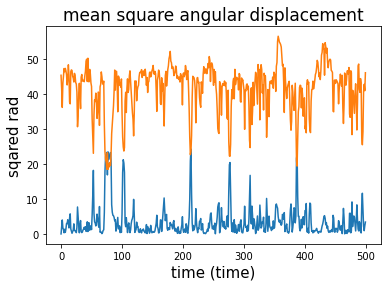

7
LAMMPS output is captured by PyLammps wrapper
500


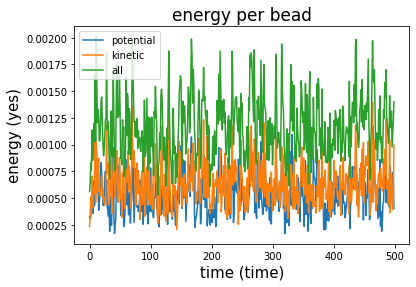

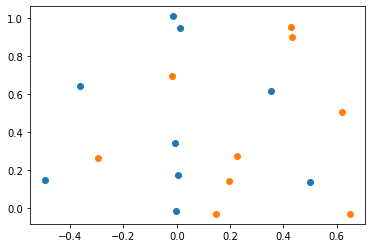

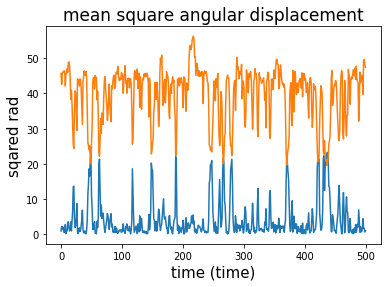

8
LAMMPS output is captured by PyLammps wrapper
500


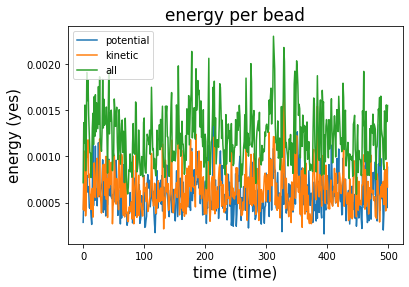

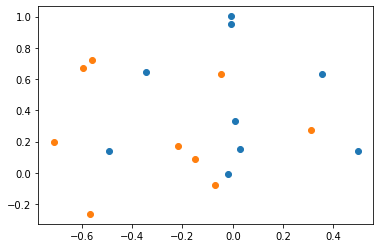

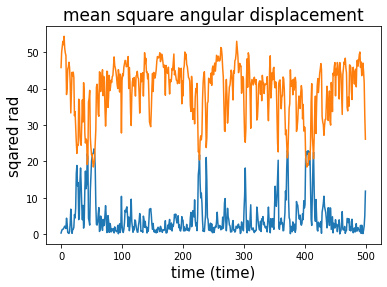

9
LAMMPS output is captured by PyLammps wrapper
500


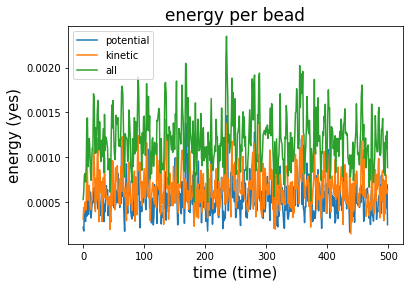

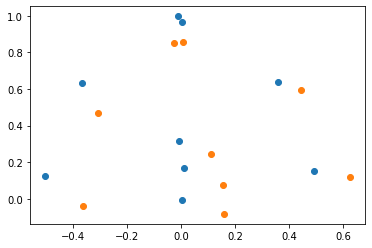

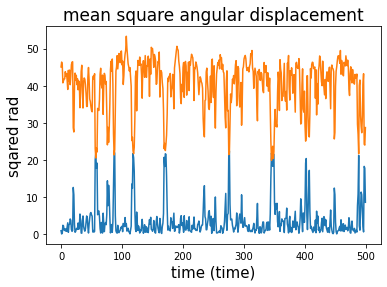

10
LAMMPS output is captured by PyLammps wrapper
500


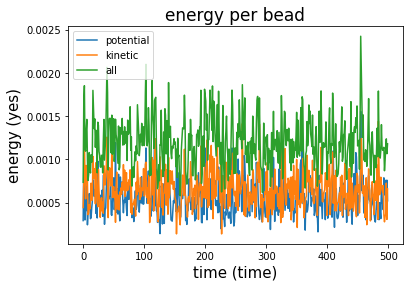

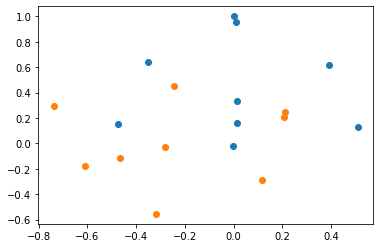

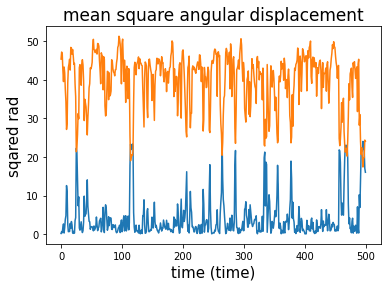

11
LAMMPS output is captured by PyLammps wrapper
500


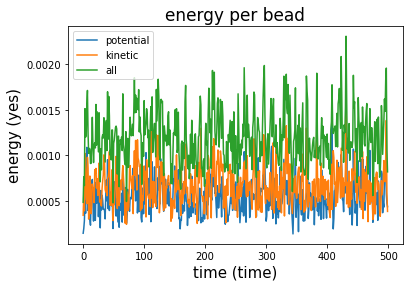

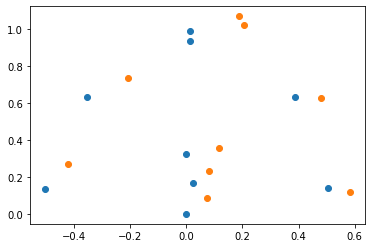

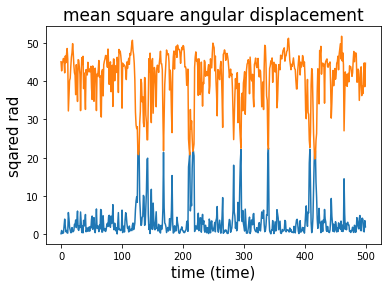

12
LAMMPS output is captured by PyLammps wrapper
500


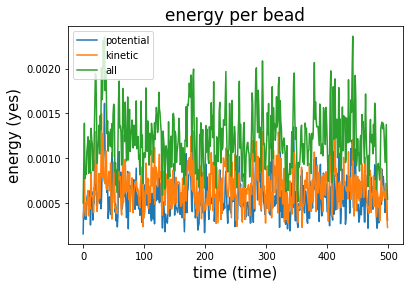

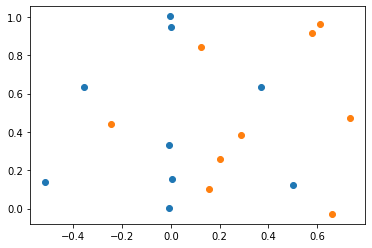

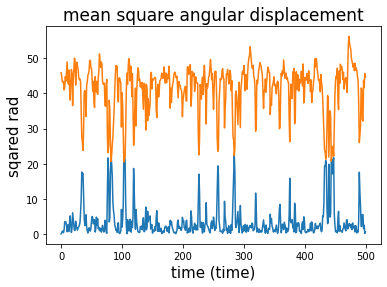

13
LAMMPS output is captured by PyLammps wrapper
500


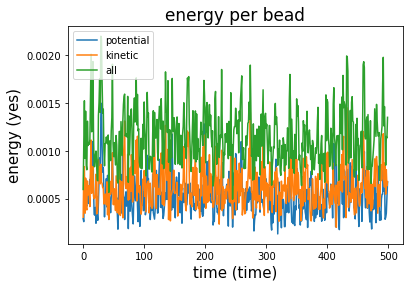

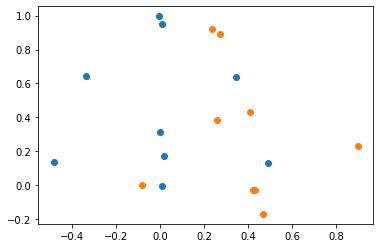

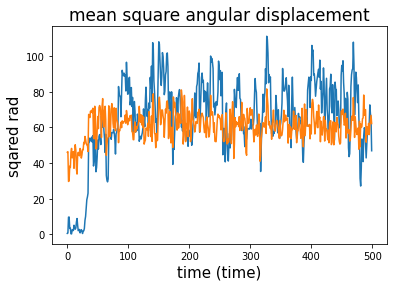

14
LAMMPS output is captured by PyLammps wrapper
500


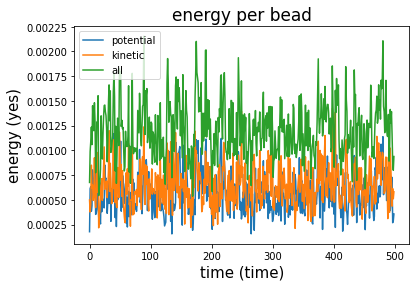

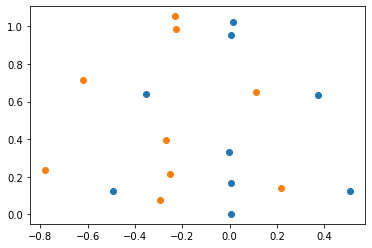

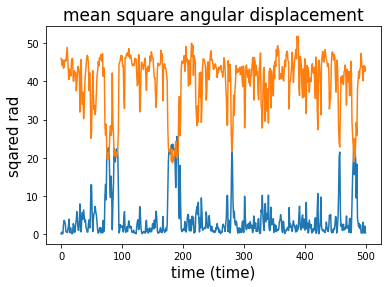

15
LAMMPS output is captured by PyLammps wrapper
500


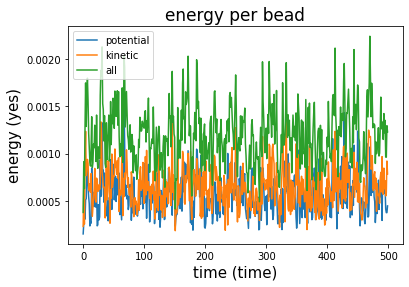

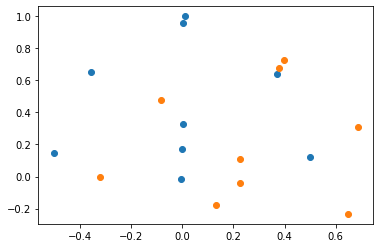

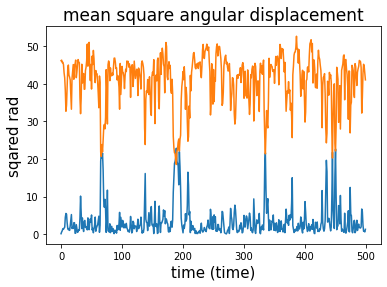

16
LAMMPS output is captured by PyLammps wrapper
500


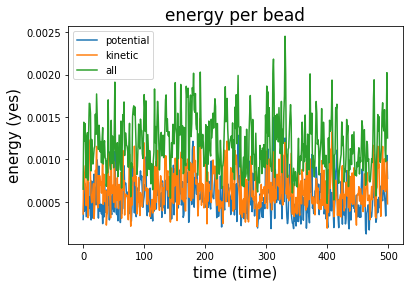

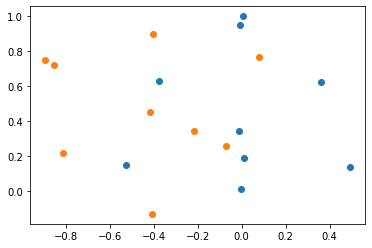

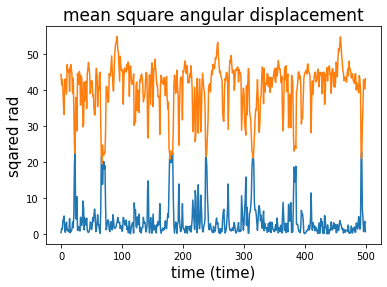

17
LAMMPS output is captured by PyLammps wrapper
500


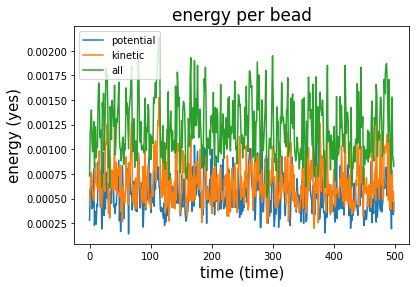

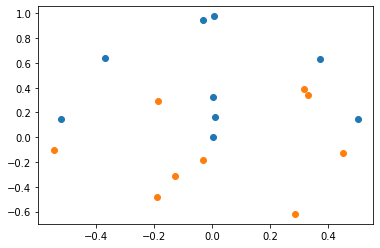

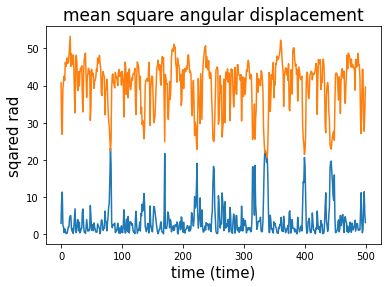

18
LAMMPS output is captured by PyLammps wrapper
500


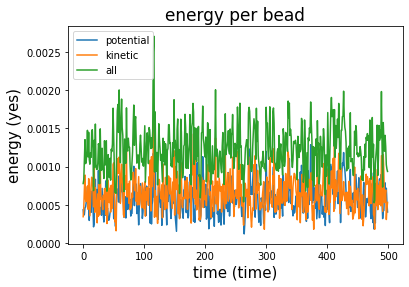

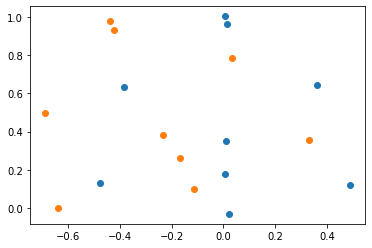

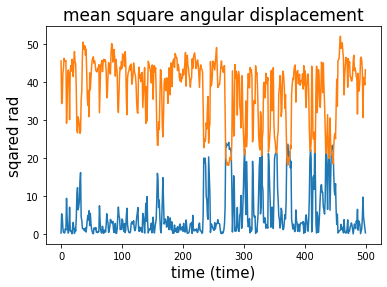

19
LAMMPS output is captured by PyLammps wrapper
500


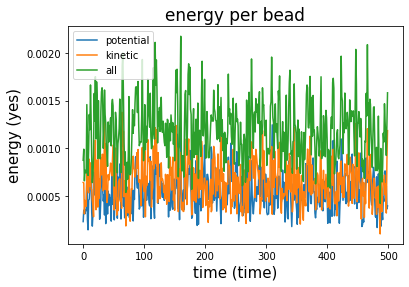

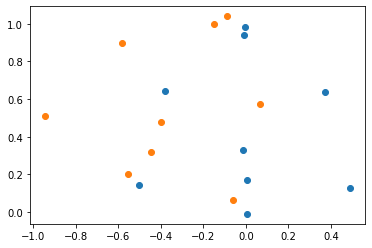

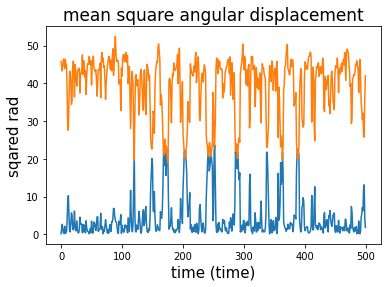

20
LAMMPS output is captured by PyLammps wrapper
500


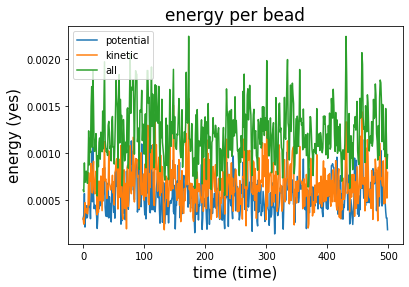

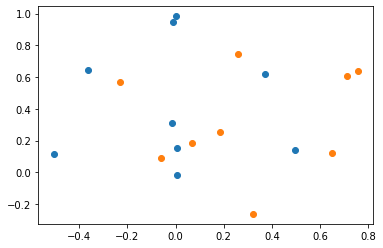

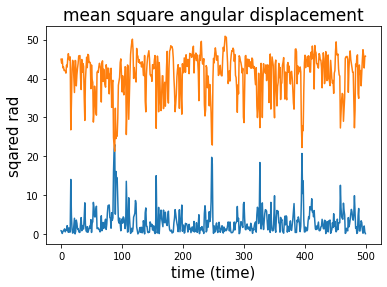

21
LAMMPS output is captured by PyLammps wrapper
500


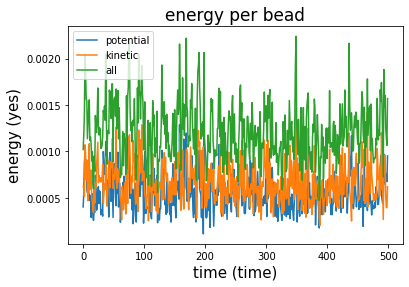

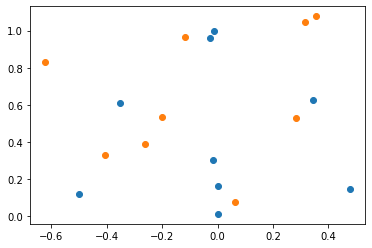

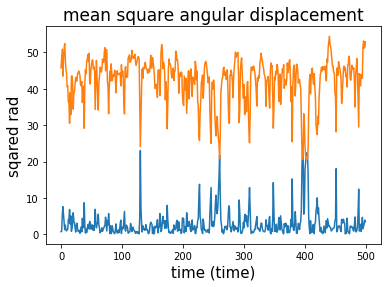

22
LAMMPS output is captured by PyLammps wrapper
500


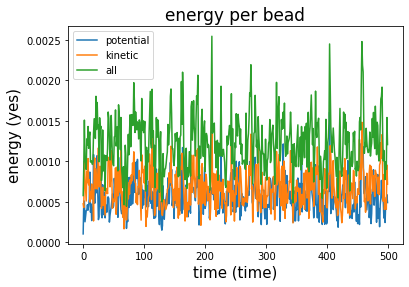

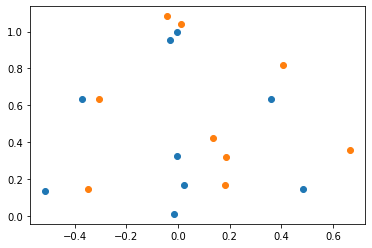

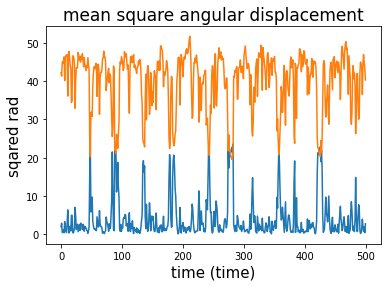

23
LAMMPS output is captured by PyLammps wrapper
500


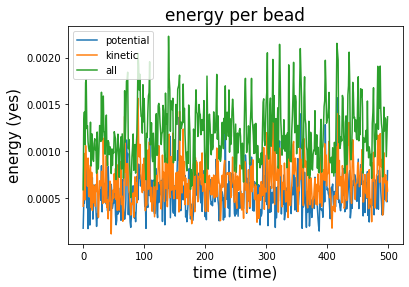

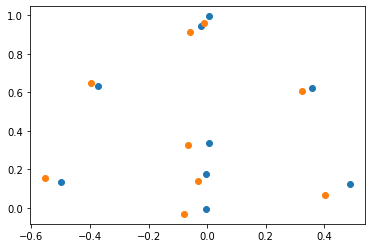

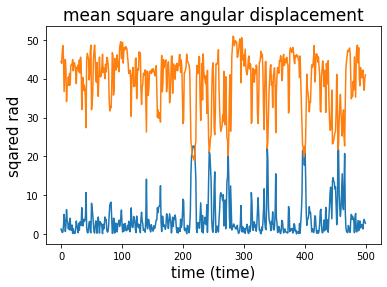

24
LAMMPS output is captured by PyLammps wrapper
500


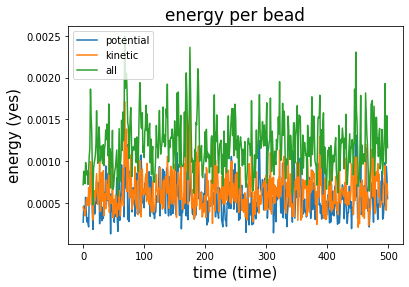

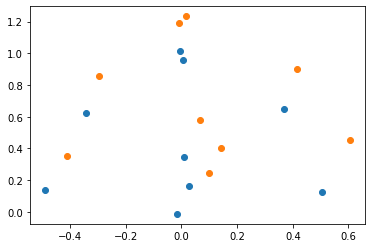

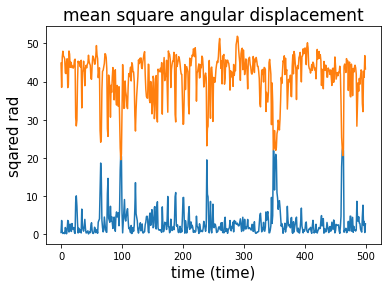

25
LAMMPS output is captured by PyLammps wrapper
500


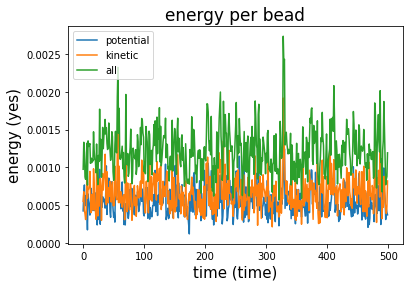

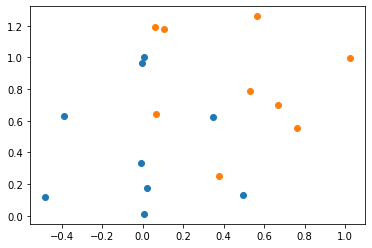

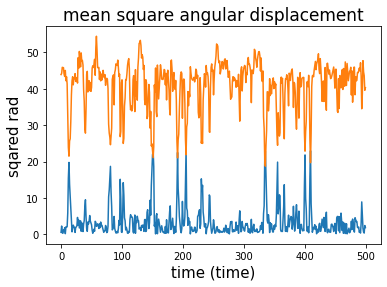

26
LAMMPS output is captured by PyLammps wrapper
500


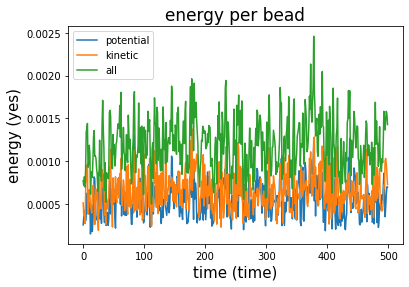

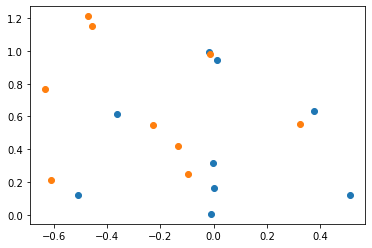

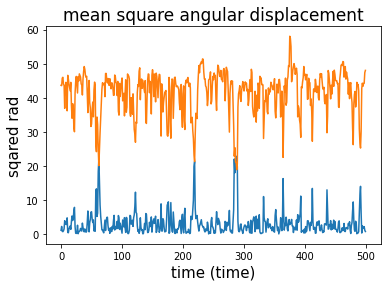

27
LAMMPS output is captured by PyLammps wrapper
500


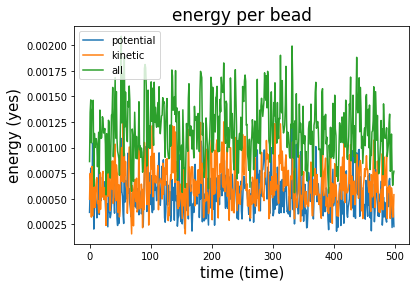

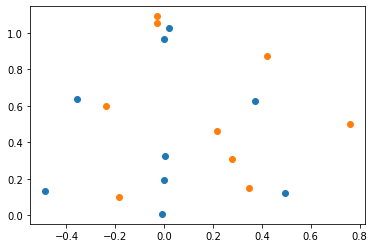

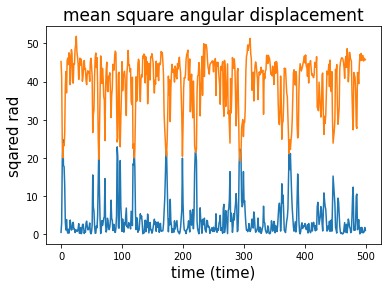

28
LAMMPS output is captured by PyLammps wrapper
500


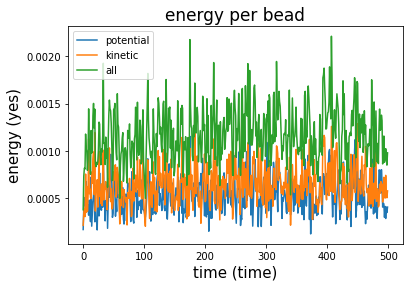

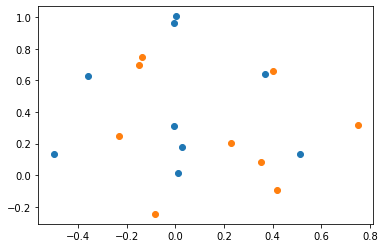

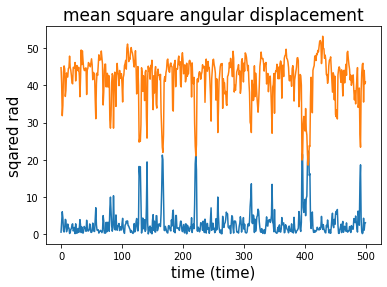

29
LAMMPS output is captured by PyLammps wrapper
500


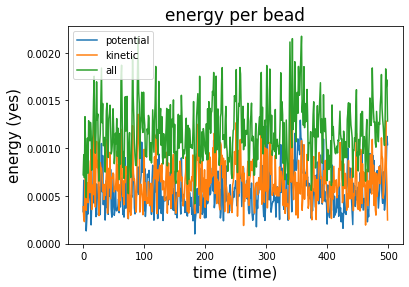

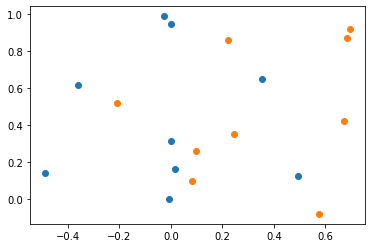

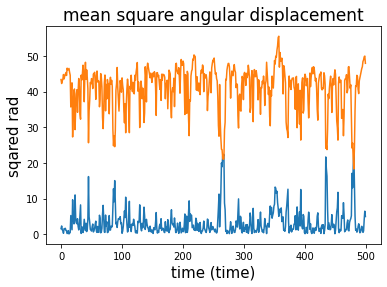

In [43]:




file_path_prion =   "/Users/mathieuouellet/Desktop/AMP/AMP/src/test/test_healthy_1_newclass.lj"
file_path_healthy = "/Users/mathieuouellet/Desktop/AMP/AMP/src/test/test_prion_1_newclass.lj"


print("\n " + file_path_prion + " \n")

ffile = Fake_file()    
protein = Protein_Template()
protein.set_healthy_structure(ffile.healthy_position, ffile.connection)
protein.set_interaction( (1,1) , (1,1), [])
protein.set_prion_structure(ffile.prion_position)
protein.create_Lammps_file(file_path_healthy, type_mol = "healthy")
protein.create_Lammps_file(file_path_prion, type_mol = "prion")

logger_list = []

for i in range(30):

    print(i)

    max_temp_totest = 0.004
    square_angle_sum = 25

    L_main = PyLammps()
    id_counter = ID_counter()
    L = MyLammps(L_main,id_counter )
    L.create_molecule_2d(file_path_prion)

    main_logger = Logger(L, [protein.healthy_position, protein.prion_position], id_struct_to_compare=["healthy", "prion"])
    max_temp =  L.run_brownian( 0.001, 1, 500, 1000000, 500, main_logger )
        

    #max_stable_temp_healthy =  get_protein_max_stability_temp(file_path_healthy, protein.healthy_position, protein.prion_position, 'healthy', max_temp_totest, square_angle_sum)
    #max_stable_temp_prion =    get_protein_max_stability_temp(file_path_prion, protein.healthy_position, protein.prion_position,'prion', max_temp_totest, square_angle_sum)
    #print(max_stable_temp_healthy,max_stable_temp_prion)

    print(max_temp)

    main_logger.plot_energy()
    main_logger.plot_positions(index_list=[0,-1])

    main_logger.plot_angular_sum_distance(["healthy", "prion"])

    logger_list.append(main_logger)

